In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Step 1: Load and preprocess the dataset
data = pd.read_csv('/content/srm0001-smu4g-_1_.csv')
# Perform any necessary data cleaning and preprocessing steps here

# Step 2: Select relevant features
# Identify the columns/features that may help predict temperature values
features = [  'TEMPC']  # Add relevant features

# Step 3: Split the data into training and testing sets
X = data[features]
y = data['TEMPC']
pressure_sample = data['TEMPC'].sample(n=24, random_state=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Choose a regression model
model = LinearRegression()  # You can choose other models like DecisionTreeRegressor or neural networks

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions for a new day
new_day_features = pd.DataFrame({
    "TEMPC":pressure_sample.values  # Add weather conditions for each time slot
})

new_day_predictions = model.predict(new_day_features)
print(new_day_predictions)

TRUE_PREDICITION  = data.loc[pressure_sample.index,"TEMPC"]
R_2_sCORE = r2_score(TRUE_PREDICITION,new_day_predictions)
print('R_2_sCORE:',R_2_sCORE)
mse = mean_squared_error(TRUE_PREDICITION,new_day_predictions)
print("mse:",mse)

[28.37 30.44 34.31 26.81 27.06 33.63 31.62 27.75 29.19 28.25 26.   28.62
 31.94 27.12 24.75 32.69 29.87 28.69 26.56 30.94 28.   28.75 27.44 26.44]
R_2_sCORE: 1.0
mse: 5.259072701473412e-30


In [ ]:
data.tail()

Date  SMF1  SMK1  SMF2  SMK2  TEMPC
10332   1/1/2023, 1:11:42 AM  7501   0.0  6780   0.0  27.94
10333  1/1/2023, 12:55:43 AM  7452   0.0  6787   0.0  27.94
10334  1/1/2023, 12:39:41 AM  7473   0.0  6798   0.0  27.94
10335  1/1/2023, 12:23:42 AM  7496   0.0  6802   0.0  27.94
10336  1/1/2023, 12:07:42 AM  7501   0.0  6790   0.0  28.00

In [ ]:
data.head(15)

Date  SMF1  SMK1  SMF2  SMK2  TEMPC
0   5/16/2023, 11:59:58 PM  5177  5.52  4978  6.24  32.13
1   5/16/2023, 11:44:01 PM  5222  5.35  4964  6.28  32.19
2   5/16/2023, 11:28:04 PM  5242  5.27  4978  6.22  32.25
3   5/16/2023, 11:12:08 PM  5253  5.22  4968  6.25  32.31
4   5/16/2023, 10:56:11 PM  5277  5.13  4988  6.17  32.38
5   5/16/2023, 10:40:14 PM  5308  5.02  4982  6.19  32.38
6   5/16/2023, 10:24:16 PM  5325  4.94  4991  6.14  32.50
7   5/16/2023, 10:08:20 PM  5366  4.79  4971  6.20  32.63
8    5/16/2023, 9:52:23 PM  5373  4.75  4988  6.13  32.63
9    5/16/2023, 9:36:26 PM  5373  4.74  4978  6.15  32.75
10   5/16/2023, 9:20:29 PM  5390  4.67  4987  6.11  32.75
11   5/16/2023, 9:04:24 PM  5401  4.63  4977  6.14  32.88
12   5/16/2023, 8:48:27 PM  5422  4.55  4978  6.13  32.94
13   5/16/2023, 8:32:32 PM  5436  4.49  4961  6.18  33.00
14   5/16/2023, 8:16:35 PM  5455  4.41  4978  6.10  33.13

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your temperature column is named 'temperature' and it is ordered by date
temperatures = data['TEMPC']

# Reset the index
temperatures = temperatures.reset_index(drop=True)

# Split the data into training and testing sets
train_size = int(len(temperatures) * 0.7)
train_data, test_data = temperatures[:train_size], temperatures

In [ ]:
# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 0, 4))  # Adjust the order as needed
model_fit = model.fit()

# Get the number of steps for the forecast
forecast_steps = len(test_data)

# Forecast the next day's temperatures
forecast_values = model_fit.forecast(steps=24)

print("Predicted temperatures for the next day:")
print(forecast_values)

Predicted temperatures for the next day:
7235    27.737436
7236    27.795570
7237    27.853374
7238    27.918038
7239    27.986065
7240    28.055765
7241    28.127378
7242    28.200854
7243    28.275597
7244    28.351125
7245    28.427147
7246    28.503365
7247    28.579461
7248    28.655146
7249    28.730166
7250    28.804288
7251    28.877293
7252    28.948986
7253    29.019189
7254    29.087746
7255    29.154515
7256    29.219374
7257    29.282216
7258    29.342950
Name: predicted_mean, dtype: float64


In [ ]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 953.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
data.head()

Date  SMF1  SMK1  SMF2  SMK2  TEMPC
0  5/16/2023, 11:59:58 PM  5177  5.52  4978  6.24  32.13
1  5/16/2023, 11:44:01 PM  5222  5.35  4964  6.28  32.19
2  5/16/2023, 11:28:04 PM  5242  5.27  4978  6.22  32.25
3  5/16/2023, 11:12:08 PM  5253  5.22  4968  6.25  32.31
4  5/16/2023, 10:56:11 PM  5277  5.13  4988  6.17  32.38

In [ ]:
data.TEMPC.unique().mean()


30.786930693069312

In [ ]:
data.TEMPC.unique().max()

37.19

In [ ]:
data.TEMPC.unique().min()

24.5

In [ ]:
data["Date"] =pd.to_datetime(data["Date"])

In [ ]:
data.head()

Date  SMF1  SMK1  SMF2  SMK2  TEMPC
0 2023-05-16 23:59:58  5177  5.52  4978  6.24  32.13
1 2023-05-16 23:44:01  5222  5.35  4964  6.28  32.19
2 2023-05-16 23:28:04  5242  5.27  4978  6.22  32.25
3 2023-05-16 23:12:08  5253  5.22  4968  6.25  32.31
4 2023-05-16 22:56:11  5277  5.13  4988  6.17  32.38

In [ ]:
plt.xticks(range(0, len(data['Date']), 5))

([<matplotlib.axis.XTick at 0x7f49c1394cd0>,
  ...],
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95'),
  Text(100, 0, '100'),
  Text(105, 0, '105'),
  Text(110, 0, '110'),
  Text(115, 0, '115'),
  Text(120, 0, '120'),
  Text(125, 0, '125'),
  Text(130, 0, '130'),
  Text(135, 0, '135'),
  Text(140, 0, '140'),
  Text(145, 0, '145'),
  Text(150, 0, '150'),
  Text(155, 0, '155'),
  Text(160, 0, '160'),
  Text(165, 0, '165'),
  Text(170, 0, '170'),
  Text(175, 0, '175'),
  Text(180, 0, '180'),
  Text(185, 0, '185'),
  Text(190, 0, '190'),
  Text(195, 0, '195'),
  Text(200, 0, '200'),
  Text(205, 0, '205'),
  Text(210, 0, '210'),
  

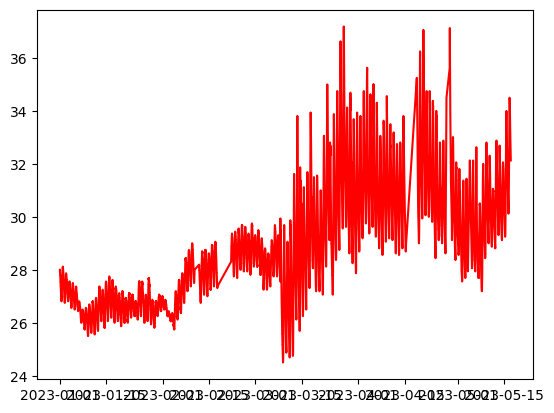

In [ ]:
plt.plot(data["Date"],data["TEMPC"],color="red",)
plt.show()



([<matplotlib.axis.XTick at 0x7f49b58aac20>,
  ...],
 [Text(0, 0, '1970-01-01'),
  Text(1, 0, '1970-01-02'),
  Text(2, 0, '1970-01-03'),
  Text(3, 0, '1970-01-04'),
  Text(4, 0, '1970-01-05'),
  Text(5, 0, '1970-01-06'),
  Text(6, 0, '1970-01-07'),
  Text(7, 0, '1970-01-08'),
  Text(8, 0, '1970-01-09'),
  Text(9, 0, '1970-01-10'),
  Text(10, 0, '1970-01-11'),
  Text(11, 0, '1970-01-12'),
  Text(12, 0, '1970-01-13'),
  Text(13, 0, '1970-01-14'),
  Text(14, 0, '1970-01-15'),
  Text(15, 0, '1970-01-16'),
  Text(16, 0, '1970-01-17'),
  Text(17, 0, '1970-01-18'),
  Text(18, 0, '1970-01-19'),
  Text(19, 0, '1970-01-20'),
  Text(20, 0, '1970-01-21'),
  Text(21, 0, '1970-01-22'),
  Text(22, 0, '1970-01-23'),
  Text(23, 0, '1970-01-24'),
  Text(24, 0, '1970-01-25'),
  Text(25, 0, '1970-01-26'),
  Text(26, 0, '1970-01-27'),
  Text(27, 0, '1970-01-28'),
  Text(28, 0, '1970-01-29'),
  Text(29, 0, '1970-01-30'),
  Text(30, 0, '1970-01-31'),
  Text(31, 0, '1970-02-01'),
  Text(32, 0, '1970-02-02'),


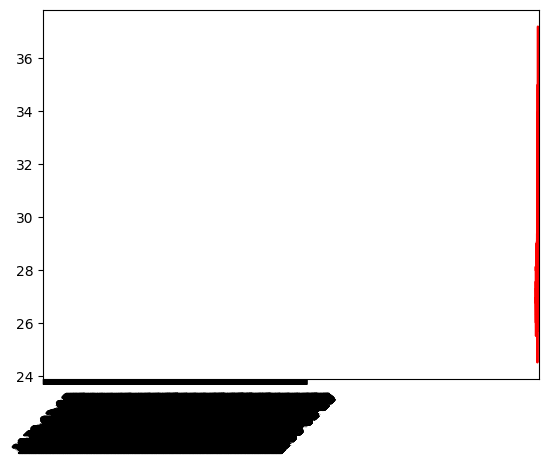

In [ ]:
import matplotlib.pyplot as plt

# Assuming your temperature column is named 'TEMPC' and the date column is named 'Date'
plt.plot(data['Date'], data['TEMPC'], color='red')  # Set line color to red

# Add a gap of 5 between each x-axis tick
plt.xticks(range(0, len(data['Date'])), rotation=45, fontsize=10)  # Rotate labels by 45 degrees and set fontsize


